1. Identify all NAs in the data.
2. Summary Statistics Table
3. Scatterplots
4. Heat Maps (Correlations)
5. Hypothesis Testing
6. Regression

In [8]:
import pandas as pd
import numpy as np
walking_data = pd.read_csv("data_sources/walkable-cities.csv",encoding='latin-1')
walking_data

,place_code,city,state,pop_estimate_2021,state_code,city_state,city_state_code,place_state_code,geo_code,land_area_sqkm,...,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
0,3076,Auburn,Alabama,78564,AL,"Auburn, Alabama","Auburn, AL",3076AL,103076.0,157.084761,...,0.370857,79325.0,29770.0,48531.0,32556.0,0.231926,NaN,NaN,NaN,NaN
1,7000,Birmingham,Alabama,197575,AL,"Birmingham, Alabama","Birmingham, AL",7000AL,107000.0,380.801025,...,0.443224,58012.0,27211.0,36614.0,36193.0,0.270712,7.4,51.0,NaN,NaN
2,20104,Decatur,Alabama,57804,AL,"Decatur, Alabama","Decatur, AL",20104AL,120104.0,140.785624,...,NaN,NaN,NaN,NaN,31259.0,NaN,NaN,39.0,NaN,NaN
3,21184,Dothan,Alabama,71175,AL,"Dothan, Alabama","Dothan, AL",21184AL,121184.0,232.650562,...,0.425725,70513.0,31168.0,45088.0,31803.0,0.209933,5.3,NaN,NaN,NaN
4,35896,Hoover,Alabama,92589,AL,"Hoover, Alabama","Hoover, AL",35896AL,135896.0,124.490626,...,0.396602,124562.0,50046.0,99276.0,36193.0,0.059813,3.5,51.0,0.001231,0.020758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,66000,Racine,Wisconsin,77127,WI,"Racine, Wisconsin","Racine, WI",66000WI,5566000.0,40.080067,...,0.400443,60267.0,24591.0,47861.0,33541.0,0.221427,6.4,43.0,0.003773,0.012836
756,84250,Waukesha,Wisconsin,71256,WI,"Waukesha, Wisconsin","Waukesha, WI",84250WI,5584250.0,66.102904,...,0.437002,88781.0,38381.0,69533.0,34586.0,0.077860,NaN,43.0,0.000940,0.009683
757,85300,West Allis,Wisconsin,59484,WI,"West Allis, Wisconsin","West Allis, WI",85300WI,5585300.0,29.477371,...,NaN,NaN,NaN,NaN,34586.0,NaN,NaN,45.0,0.003547,0.028344
758,13150,Casper,Wyoming,58656,WY,"Casper, Wyoming","Casper, WY",13150WY,5613150.0,68.757037,...,NaN,NaN,NaN,NaN,30785.0,NaN,NaN,42.0,0.002881,0.028590


In [9]:
#1. Identify all NAs in the data.
col_na = walking_data.isna().sum().to_frame().reset_index(level=0).set_axis(["variable","sum_na"], axis="columns", copy=False)
row_na = walking_data["city_state"]
row_na = pd.concat([row_na, walking_data.isna( ).sum(axis="columns")], axis=1)
row_na = row_na.set_axis(["city_state","sum_na"],axis="columns", copy=False)

col_na.to_csv("column_na_orig.csv", index = False)
row_na.to_csv("row_na_orig.csv", index = False)

# remove cols and rows with more than 30% NAs
nrow = len(walking_data)

keep_cols = list(walking_data.columns[col_na["sum_na"]/nrow <= .30])
walking_data = walking_data[keep_cols]

mcol = len(walking_data.columns)

row_na = walking_data["city_state"]
row_na = pd.concat([row_na, walking_data.isna( ).sum(axis="columns")], axis=1)
row_na = row_na.set_axis(["city_state","sum_na"],axis="columns", copy=False)

keep_rows = row_na["sum_na"]/mcol <= .30
walking_data = walking_data[keep_rows]

walking_data #725 rows × 66 columns

#calc NAs again
col_na = walking_data.isna().sum().to_frame().reset_index(level=0).set_axis(["variable","sum_na"], axis="columns", copy=False)
row_na = walking_data["city_state"]
row_na = pd.concat([row_na, walking_data.isna( ).sum(axis="columns")], axis=1)
row_na = row_na.set_axis(["city_state","sum_na"],axis="columns", copy=False)

col_na.to_csv("column_na_after.csv", index = False)
row_na.to_csv("row_na_after.csv", index = False)

walking_data.to_csv("walkable_cities.csv", index=False)

In [10]:
# 2. Summary Statistics Table
walking_data.describe()

,place_code,pop_estimate_2021,geo_code,land_area_sqkm,pop_per_km2,median_age,male,female,white_alone,black_or_african_american_alone,...,bike_score,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,median_aqi,violent_crime,property_crime
count,725.000000,7.250000e+02,7.240000e+02,724.000000,724.000000,537.000000,537.000000,537.000000,724.000000,724.000000,...,725.000000,536.000000,536.000000,537.000000,537.000000,724.000000,537.000000,678.000000,605.000000,605.000000
mean,42291.784828,1.506342e+05,2.418731e+06,130.673703,1587.638018,36.584544,0.492563,0.507903,0.531691,0.129210,...,46.169655,0.381301,98041.358209,37861.156425,74180.268156,38863.197514,0.134776,47.150442,0.004152,0.025027
std,24069.480448,2.521481e+05,1.698510e+06,182.038034,1473.152226,4.397103,0.018441,0.017999,0.197340,0.146297,...,12.352004,0.049792,33542.319217,13132.181104,26597.660232,6544.397424,0.061492,17.393383,0.003152,0.011959
min,0.000000,5.010400e+04,1.030760e+05,3.238030,99.541631,22.800000,0.427906,0.342966,0.029810,0.002961,...,12.000000,0.245462,49626.000000,17236.000000,32217.000000,29353.000000,0.017209,15.000000,0.000316,0.005378
25%,21020.000000,6.425100e+04,6.691750e+05,48.545186,807.851379,33.900000,0.481269,0.497002,0.397990,0.029702,...,38.000000,0.349594,75702.250000,28749.000000,55228.000000,34243.000000,0.087502,38.000000,0.001928,0.016705
50%,43000.000000,8.683600e+04,1.930495e+06,79.956018,1186.835138,36.500000,0.492833,0.507607,0.538075,0.072320,...,45.000000,0.386846,90045.500000,35073.000000,68428.000000,37075.000000,0.129226,42.000000,0.003506,0.022423
75%,62000.000000,1.354070e+05,3.964280e+06,137.020388,1835.651650,39.000000,0.503373,0.519043,0.691317,0.178526,...,52.000000,0.415935,112280.250000,43231.000000,86459.000000,42241.000000,0.172020,49.000000,0.005624,0.031772
max,88940.000000,3.849297e+06,5.613900e+06,1935.461994,19691.366525,51.000000,0.657102,0.571949,0.877240,0.895777,...,99.000000,0.516764,268748.000000,102537.000000,205219.000000,64090.000000,0.421409,122.000000,0.020618,0.086487


In [90]:
# 3. Scatterplots
import seaborn
import matplotlib.pyplot as plt
 
# restrict to numerical variables
# pairplot
#seaborn.pairplot(walking_data)
# to show
#plt.show()

KeyboardInterrupt: 

<AxesSubplot: >

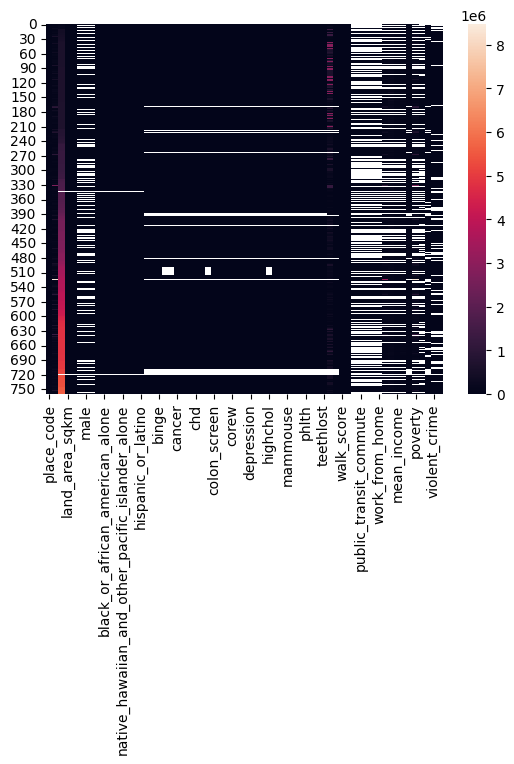

In [6]:
# 4. Heat Maps (Correlations)
import seaborn
import matplotlib.pyplot as plt
# need to restrict to numerical data only

seaborn.heatmap(walking_data.select_dtypes("number"))


In [ ]:
# 5. Hypothesis Testing


In [ ]:
# 6. Regression